# COVID 19 Detection using Logistic Regression

## Data Description
The covid_dataset we'll use is fake generated data that comprises the following features:

- Age: Represents the age of the patients in years. It ranges from 18 to 89.

- Temperature: Indicates the body temperature of the patients. The values are normally distributed around 37.5 with a standard deviation of 0.5.

- Cough: Indicates whether the patients have a cough. It is a categorical feature with two options: "Yes" or "No".

- Sore Throat: Indicates whether the patients have a sore throat. It is a categorical feature with two options: "Yes" or "No".

- Fatigue: Indicates whether the patients experience fatigue. It is a categorical feature with two options: "Yes" or "No".

- Daily Vitamin D Intake: Represents the daily intake of vitamin D in International Units (IU). The values range from 400 to 2000 and are randomly generated.

- COVID-19 Positive: Indicates whether the patients are COVID-19 positive. It is a categorical target variable with two options: "Yes" or "No".

In [1]:
import pandas as pd
data = pd.read_csv('/content/covid_dataset.csv')
data

,Age,Temperature,Cough,Sore Throat,Fatigue,Daily Vitamin D Intake,COVID-19 Positive
0,69,37.371591,No,Yes,Yes,542,Yes
1,32,38.012143,No,Yes,No,1624,No
2,89,36.688738,Yes,No,No,1603,No
3,78,37.670494,Yes,Yes,Yes,1113,Yes
4,38,37.512786,Yes,No,No,1787,No
...,...,...,...,...,...,...,...
995,27,37.580782,Yes,Yes,Yes,1952,No
996,51,37.200816,No,Yes,Yes,1974,No
997,72,38.320523,Yes,No,No,703,No
998,49,37.624599,No,No,Yes,1341,No


## Data Exploration

Missing Values:
 Age                       0
Temperature               0
Cough                     0
Sore Throat               0
Fatigue                   0
Daily Vitamin D Intake    0
COVID-19 Positive         0
dtype: int64
Statistical Measures:
                Age  Temperature  Daily Vitamin D Intake
count  1000.000000  1000.000000             1000.000000
mean     52.881000    37.531243             1200.279000
std      20.958915     0.510427              459.931364
min      18.000000    35.824195              403.000000
25%      34.750000    37.191691              814.000000
50%      52.500000    37.526769             1199.000000
75%      71.000000    37.880216             1612.250000
max      89.000000    39.083686             1999.000000


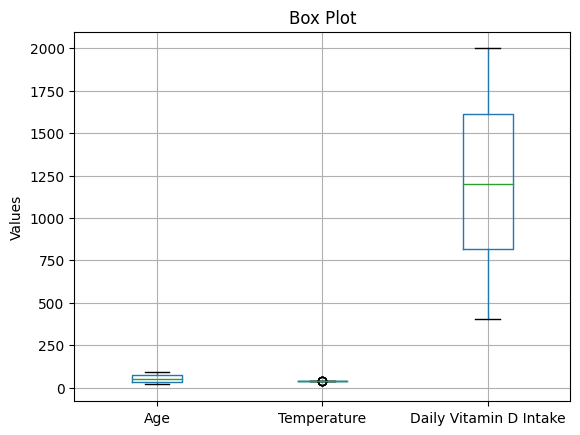

In [2]:

import matplotlib.pyplot as plt


# Check for missing values
missing_values = data.isnull().sum()
print("Missing Values:\n", missing_values)

# Calculate statistical measures
statistics = data.describe()
print("Statistical Measures:\n", statistics)

# Create a box plot for outlier detection
data.boxplot(column=['Age', 'Temperature', 'Daily Vitamin D Intake'])
plt.title('Box Plot')
plt.ylabel('Values')
plt.show()

Let's create a separate plot for temperature

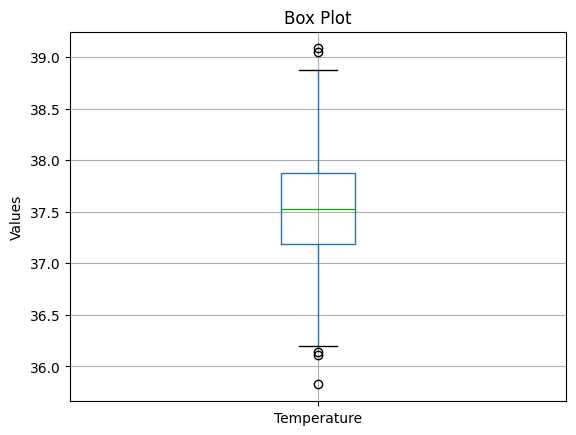

In [3]:
data.boxplot(column=['Temperature'])
plt.title('Box Plot')
plt.ylabel('Values')
plt.show()

Temperature higher than the maximum or lower than the minimum might not always be outliers!

## Fix Data Types

In [4]:

# Define the encoding dictionary
encoding_dict = {
    'Cough': {'No': 0, 'Yes': 1},
    'Sore Throat': {'No': 0, 'Yes': 1},
    'Fatigue': {'No': 0, 'Yes': 1},
    'COVID-19 Positive': {'No': 0, 'Yes': 1}
}

# Apply encoding to the DataFrame
data.replace(encoding_dict, inplace=True)

# Display the updated DataFrame
print(data.head())

   Age  Temperature  Cough  Sore Throat  Fatigue  Daily Vitamin D Intake  \
0   69    37.371591      0            1        1                     542   
1   32    38.012143      0            1        0                    1624   
2   89    36.688738      1            0        0                    1603   
3   78    37.670494      1            1        1                    1113   
4   38    37.512786      1            0        0                    1787   

   COVID-19 Positive  
0                  1  
1                  0  
2                  0  
3                  1  
4                  0  


## Modeling

### Split the Data

In [5]:

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score


# Split the data into features (X) and target (y)
X = data.drop('COVID-19 Positive', axis=1)
y = data['COVID-19 Positive']

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


### Fit and evaluate the classifier

In [6]:

# Create a logistic regression model
model = LogisticRegression()

# Fit the model on the training data
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Calculate the accuracy of the model
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)


Accuracy: 0.915
